## NER

In [ ]:
import nltk as nltk
import nltk.corpus  
from nltk.text import Text
import pandas as pd
import re
import spacy 
#from spacy import displacy

In [ ]:
df = pd.read_pickle("data_with_similarity.pkl")

In [ ]:
df = df[(df["topic1"] != 13 ) & (df["topic1"]!=9) & (df["topic1"]!=20) & (df["topic1"]!=4)]

In [ ]:
df = df[df["w1"]>0.9]

In [ ]:
df.shape

(39893, 19)

In [ ]:
#delete \n
df["text_clean"] = df["text"].apply(lambda x : re.sub("\n"," ",x))

#delete url
pattern = "((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*"
df["text_clean"] = df["text_clean"].apply(lambda x:re.sub(pattern,"",x))

In [ ]:
df

,date,language,title,text,text_clean,cluster,topic1,w1,topic2,w2,topic3,w3,Topic_cluster,sentiment,sentiment_prob_0,sentiment_prob_1,population,business,resident
0,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,CHICAGO (AP) — Chicago school leaders canceled...,0,1,0.998010,NaN,NaN,NaN,NaN,7,0,1.000000e+00,5.045681e-16,0.094708,0.089997,0.068338
1,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,CHICAGO (AP) — Chicago school leaders canceled...,0,1,0.998145,NaN,NaN,NaN,NaN,10,0,1.000000e+00,4.040775e-19,0.093367,0.090444,0.068236
6,2022-01-06,english,Illinois child welfare worker fatally stabbed ...,An Illinois child welfare worker was stabbed t...,An Illinois child welfare worker was stabbed t...,0,2,0.908319,0.0,0.012049,NaN,NaN,4,0,5.392498e-01,4.607502e-01,0.107548,0.070350,0.141270
12,2022-02-10,english,Leons carries Bradley past Loyola Chicago 68-61,"PEORIA, Ill. -- Malevy Leons had 14 points to ...","PEORIA, Ill. -- Malevy Leons had 14 points to ...",0,15,0.982644,NaN,NaN,NaN,NaN,4,1,1.710809e-01,8.289191e-01,0.052155,0.027573,0.048028
15,2022-02-10,english,Getting The Chicago Family Lawyer To Work,Getting The Chicago Family Lawyer To Work\nA B...,Getting The Chicago Family Lawyer To Work A Bi...,0,19,0.998506,NaN,NaN,NaN,NaN,8,1,3.122558e-06,9.999969e-01,0.077189,0.101804,0.072409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181838,2022-03-30,english,"Man charged with shooting Chicago cop, inuring...",CHICAGO - A 28-year-old man has been charged w...,CHICAGO - A 28-year-old man has been charged w...,0,2,0.991741,NaN,NaN,NaN,NaN,5,0,9.975539e-01,2.446131e-03,0.074509,0.074482,0.120522
181851,2022-01-03,english,Rumored Buzz on Chicago Truck Accident Lawyers,Rumored Buzz on Chicago Truck Accident Lawyers...,Rumored Buzz on Chicago Truck Accident Lawyers...,0,0,0.976806,2.0,0.021562,NaN,NaN,4,1,1.618705e-13,1.000000e+00,0.065426,0.127799,0.058177
181855,2022-03-05,english,Chicago girl shot after celebrating 12th birth...,CHICAGO — A girl who was shot in the head by a...,CHICAGO — A girl who was shot in the head by a...,0,2,0.987939,NaN,NaN,NaN,NaN,5,0,9.998809e-01,1.191043e-04,0.088040,0.068949,0.110678
181859,2022-03-05,english,"Restaurante The Ogden Chicago – Chicago, , IL ...",Enjoyed the varied menu. The nacho tower prese...,Enjoyed the varied menu. The nacho tower prese...,0,18,0.911269,0.0,0.010952,NaN,NaN,4,1,1.652971e-02,9.834703e-01,0.074384,0.087282,0.059210


In [ ]:
nlp = spacy.load("en_core_web_lg")

In [ ]:
temp = df.iloc[0:10,]

In [ ]:
all_orgs = []
all_person = []
i = 0

for text in df.text_clean:    
    doc = nlp(text)

    orgs = []
    pers = []

    for ent in doc.ents:
        if ent.label_ == "ORG":
            orgs.append(ent.text)
        elif ent.label_ == "PERSON":
            pers.append(ent.text)
    
    all_orgs.append(orgs)
    all_person.append(pers)
    print(i)
    i = i+1
    
result = pd.DataFrame()
result["text"] = df["text"]
result["orgs"] = all_orgs
result["person"] = all_person

In [ ]:
result.to_pickle("ner_new.pkl")

In [ ]:
result

,text,orgs,person
0,CHICAGO (AP) — Chicago school leaders canceled...,"[AP, The Chicago Teachers Union, Chicago Publi...","[Pedro Martinez, Jen Psaki, Joe Biden, Donald ..."
1,CHICAGO (AP) — Chicago school leaders canceled...,"[AP, The Chicago Teachers Union, Chicago Publi...","[Pedro Martinez, Martinez, Jesse Sharkey, Lori..."
6,An Illinois child welfare worker was stabbed t...,[],[Dawn Sterling]
12,"PEORIA, Ill. -- Malevy Leons had 14 points to ...","[Braves, Loyola Chicago, Braves, MVC, Ramblers...","[Malevy Leons, Bradley, Mikey Howell, Zek Mont..."
15,Getting The Chicago Family Lawyer To Work\nA B...,"[Chicago Family Lawyer, Chicago Divorce Attorn...",[]
...,...,...,...
181838,CHICAGO - A 28-year-old man has been charged w...,[CPD Supt],"[James Callion, David Brown]"
181851,Rumored Buzz on Chicago Truck Accident Lawyers...,"[CDL, the Federal Motor Carrier Protection Law...","[Joe, Joe, Joe, Steve, Joseph Shannon, Jack, J..."
181855,CHICAGO — A girl who was shot in the head by a...,"[the Cook County Medical Examiner’s Office, Co...","[Nyzireya Moore, David Brown, Brown]"
181859,Enjoyed the varied menu. The nacho tower prese...,[],[]


In [ ]:
orgs = result["orgs"]
orgs = orgs.explode()
orgs_df = pd.DataFrame(orgs)
orgs_df.loc[orgs_df["orgs"] == "the Securities and Exchange Commission", "orgs"] ="SEC"
orgs_df.loc[orgs_df["orgs"] == "the Securities & Exchange Commission", "orgs"] ="SEC"
orgs_df.loc[orgs_df["orgs"] == "Illinois Tool Works", "orgs"] ="ITW"
orgs_df.loc[orgs_df["orgs"] == "Illinois Tool Works Inc.", "orgs"] ="ITW"
orgs_df.loc[orgs_df["orgs"] == "Illinois Tool Works’s", "orgs"] ="ITW"
orgs_df.loc[orgs_df["orgs"] == "ITW – Get Rating", "orgs"] ="ITW"
org_cnt_all = pd.DataFrame(orgs_df.groupby(by="orgs").size().sort_values(ascending=False), columns = ["cnt"])
org_20 = org_cnt_all.head(20).reset_index()
org_20

,orgs,cnt
0,ITW,44405
1,NYSE,9513
2,SEC,9375
3,NFL,7576
4,AP,6246
5,GM,4704
6,Bulls,4449
7,Illini,4004
8,Morgan Stanley,3340
9,CPS,2756


In [ ]:
ppls = result["person"]
ppls = ppls.explode()
ppls_df = pd.DataFrame(ppls)
ppl_cnt_all = pd.DataFrame(ppls_df.groupby(by="person").size().sort_values(ascending=False), columns = ["cnt"])
ppl_20 = ppl_cnt_all.head(20).reset_index()
ppl_20

,person,cnt
0,Lightfoot,4299
1,Madigan,3724
2,Ryan Poles,3217
3,DeRozan,2564
4,Lori Lightfoot,2434
5,Nagy,2434
6,Matt Eberflus,2080
7,Matt Nagy,2037
8,Justin Fields,1999
9,Brown,1969


In [ ]:
nlp2 = spacy.load("en_core_web_lg")

In [ ]:
all_orgs2 = []
all_person2 = []
i = 0

for text in df.text_clean:    
    doc = nlp2(text)

    orgs = []
    pers = []

    for ent in doc.ents:
        if ent.label_ == "ORG":
            orgs.append(ent.text)
        elif ent.label_ == "PERSON":
            pers.append(ent.text)
    
    all_orgs2.append(orgs)
    all_person2.append(pers)
    print(i)
    i = i+1
    
result2 = pd.DataFrame()
result2["text"] = df["text"]
result2["orgs"] = all_orgs2
result2["person"] = all_person2

In [ ]:
result2.to_pickle("ner_lg.pkl")

In [ ]:
result2

,text,orgs,person
0,CHICAGO (AP) — Chicago school leaders canceled...,"[the chicago teachers union, white house, crai...","[pedro martinez, jen psaki, joe biden, donald ..."
1,CHICAGO (AP) — Chicago school leaders canceled...,"[the chicago teachers union, white house, craig]","[pedro martinez, jesse sharkey, lori lightfoot..."
6,An Illinois child welfare worker was stabbed t...,[],[]
12,"PEORIA, Ill. -- Malevy Leons had 14 points to ...","[malevy leons, braves, loyola chicago , ...","[bradley, mikey howell, zek montgomery, terry ..."
15,Getting The Chicago Family Lawyer To Work\nA B...,"[bc, adr, adr, adr]",[chicago]
...,...,...,...
181838,CHICAGO - A 28-year-old man has been charged w...,[cpd],"[james callion, david brown]"
181851,Rumored Buzz on Chicago Truck Accident Lawyers...,[cdl],"[joe, joe, steve, joseph shannon, jack]"
181855,CHICAGO — A girl who was shot in the head by a...,[the cook county medical],"[nyzireya moore, david brown]"
181859,Enjoyed the varied menu. The nacho tower prese...,[],[]


In [ ]:
orgs = result2["orgs"]
orgs = orgs.explode()
orgs_df = pd.DataFrame(orgs)
orgs_df

,orgs
0,the chicago teachers union
0,white house
0,craig
0,lincoln
0,the associated press
...,...
181855,the cook county medical
181859,NaN
181869,barnard
181869,james court


In [ ]:
org_cnt = pd.DataFrame(orgs_df.groupby(by="orgs").size().sort_values(ascending=False), columns = ["cnt"])
org_cnt.head(20)

,cnt
orgs,
llc,8930
nfl,8907
nyse,6710
sec,5173
gm,4185
itw,3824
morgan stanley,3204
illini,3171
illinois,3121


## Target sentiment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataPath = "/content/drive/MyDrive/NLP/"

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
org_ppl = pd.read_pickle("ner_new.pkl")

In [ ]:
entity = {"Illinois Tool Works Inc","ITW","Illinois Tool Works","Illinois Tool Works’s","ITW – Get Rating"}
test = {"NYSE"}
entity & test

set()

In [ ]:
ITW= org_ppl[[ False if set(x) & entity ==set() else True for x in org_ppl["orgs"]]]
ITW

,text,orgs,person
264,Analysts expect that Illinois Tool Works Inc. ...,"[Illinois Tool Works Inc., NYSE, ITW, Zacks In...","[Lei Zhang Schlitz, Jay L. Henderson, Richard ..."
303,State Board of Administration of Florida Retir...,[State Board of Administration of Florida Reti...,"[Flossbach Von Storch AG, Flossbach Von Storch..."
327,BlackRock Inc. cut its position in shares of I...,"[BlackRock Inc., Illinois Tool Works Inc., NYS...","[Flossbach Von Storch AG, Flossbach Von Storch..."
414,Illinois Tool Works Inc. ( NYSE:ITW – Get Rati...,"[Illinois Tool Works Inc., NYSE, ITW – Get Rat...",[Ernest Scott Santi]
459,BlackRock Inc. cut its position in shares of I...,"[BlackRock Inc., Illinois Tool Works Inc., NYS...","[Flossbach Von Storch AG, Flossbach Von Storch..."
...,...,...,...
181600,Insight Folios Inc increased its stake in Illi...,"[Insight Folios Inc, Illinois Tool Works Inc.,...","[Ernest Scott Santi, Warren Buffett]"
181714,First Horizon Advisors Inc. grew its holdings ...,"[First Horizon Advisors Inc., Illinois Tool Wo...",[Jay L. Henderson]
181724,BlueSky Wealth Advisors LLC acquired a new pos...,"[BlueSky Wealth Advisors LLC, Illinois Tool Wo...","[Lei Zhang Schlitz, Ernest Scott Santi]"
181812,Signaturefd LLC boosted its stake in shares of...,"[LLC, Illinois Tool Works Inc., NYSE, ITW – Ge...",[Ernest Scott Santi]


In [ ]:
df

,date,language,title,text,text_clean,cluster,topic1,w1,topic2,w2,topic3,w3,Topic_cluster,sentiment,sentiment_prob_0,sentiment_prob_1,population,business,resident
0,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,CHICAGO (AP) — Chicago school leaders canceled...,0,1,0.998010,NaN,NaN,NaN,NaN,7,0,1.000000e+00,5.045681e-16,0.094708,0.089997,0.068338
1,2022-01-06,english,"No deal, no school: Chicago cancels classes fo...",CHICAGO (AP) — Chicago school leaders canceled...,CHICAGO (AP) — Chicago school leaders canceled...,0,1,0.998145,NaN,NaN,NaN,NaN,10,0,1.000000e+00,4.040775e-19,0.093367,0.090444,0.068236
6,2022-01-06,english,Illinois child welfare worker fatally stabbed ...,An Illinois child welfare worker was stabbed t...,An Illinois child welfare worker was stabbed t...,0,2,0.908319,0.0,0.012049,NaN,NaN,4,0,5.392498e-01,4.607502e-01,0.107548,0.070350,0.141270
12,2022-02-10,english,Leons carries Bradley past Loyola Chicago 68-61,"PEORIA, Ill. -- Malevy Leons had 14 points to ...","PEORIA, Ill. -- Malevy Leons had 14 points to ...",0,15,0.982644,NaN,NaN,NaN,NaN,4,1,1.710809e-01,8.289191e-01,0.052155,0.027573,0.048028
15,2022-02-10,english,Getting The Chicago Family Lawyer To Work,Getting The Chicago Family Lawyer To Work\nA B...,Getting The Chicago Family Lawyer To Work A Bi...,0,19,0.998506,NaN,NaN,NaN,NaN,8,1,3.122558e-06,9.999969e-01,0.077189,0.101804,0.072409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181838,2022-03-30,english,"Man charged with shooting Chicago cop, inuring...",CHICAGO - A 28-year-old man has been charged w...,CHICAGO - A 28-year-old man has been charged w...,0,2,0.991741,NaN,NaN,NaN,NaN,5,0,9.975539e-01,2.446131e-03,0.074509,0.074482,0.120522
181851,2022-01-03,english,Rumored Buzz on Chicago Truck Accident Lawyers,Rumored Buzz on Chicago Truck Accident Lawyers...,Rumored Buzz on Chicago Truck Accident Lawyers...,0,0,0.976806,2.0,0.021562,NaN,NaN,4,1,1.618705e-13,1.000000e+00,0.065426,0.127799,0.058177
181855,2022-03-05,english,Chicago girl shot after celebrating 12th birth...,CHICAGO — A girl who was shot in the head by a...,CHICAGO — A girl who was shot in the head by a...,0,2,0.987939,NaN,NaN,NaN,NaN,5,0,9.998809e-01,1.191043e-04,0.088040,0.068949,0.110678
181859,2022-03-05,english,"Restaurante The Ogden Chicago – Chicago, , IL ...",Enjoyed the varied menu. The nacho tower prese...,Enjoyed the varied menu. The nacho tower prese...,0,18,0.911269,0.0,0.010952,NaN,NaN,4,1,1.652971e-02,9.834703e-01,0.074384,0.087282,0.059210


In [ ]:
all_orgs = []
org_sent = []
all_person = []
ppl_sent = []
i = 0

for text in df.text_clean:    
    doc = nlp(text)

    for ent in doc.ents:
        if ent.label_ == "ORG":
            all_orgs.append(ent.text)
            org_sent.append(ent.sent.text)
        elif ent.label_ == "PERSON":
            all_person.append(ent.text)
            ppl_sent.append(ent.sent.text)
    # all_orgs.append(orgs)
    # org_sent.append(orgs_s)
    # all_person.append(pers)
    # ppl_sent.append(pers_s)
    print(i)
    i = i+1


In [ ]:
df_org = pd.DataFrame({'Entities':all_orgs,'Sentence': org_sent})
df_ppl = pd.DataFrame({'Entities':all_person,'Sentence': ppl_sent})

In [ ]:
df_org.to_pickle("org_sent.pkl")
df_ppl.to_pickle("ppl_sent.pkl")

In [ ]:
df_org = pd.read_pickle("org_sent.pkl")
df_ppl = pd.read_pickle("ppl_sent.pkl")

In [ ]:
df_org

,Entities,Sentence
0,AP,CHICAGO (AP) — Chicago school leaders canceled...
1,The Chicago Teachers Union,The Chicago Teachers Union sought to revert to...
2,Chicago Public Schools,But Chicago Public Schools leaders have said r...
3,White House,"White House press secretary Jen Psaki, echoing..."
4,Chicago Teachers Union,Chicago Teachers Union President Jesse Sharkey...
...,...,...
511260,Real Estate](/stories,[Real Estate](/stories/tag/10-real-estate)
511261,Real Estate](/stories,[Real Estate](/stories/tag/10-real-estate)
511262,Real Estate](/stories,[Real Estate](/stories/tag/10-real-estate)
511263,Real Estate](/stories,[Real Estate](/stories/tag/10-real-estate)


In [ ]:
from joblib import dump, load
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
model = load("logreg.joblib")

/Users/crystal/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/crystal/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/crystal/miniforge3/envs/tensorflow/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator Pipeline from version 0.24.2

In [ ]:
org_lg= df_org.copy().reset_index()
lg_pre = model.predict(org_lg.Sentence)
lg_pro = model.predict_proba(org_lg.Sentence)

In [ ]:
lg_pro = pd.DataFrame(lg_pro,columns=["0_prob","1_prob"])

In [ ]:
org_lg["senti"] = lg_pre
org_lg["0_prob"] = lg_pro["0_prob"]
org_lg["1_prob"] = lg_pro["1_prob"]
org_lg

,index,Entities,Sentence,senti,0_prob,1_prob
0,0,AP,CHICAGO (AP) — Chicago school leaders canceled...,0,0.915942,0.084058
1,1,The Chicago Teachers Union,The Chicago Teachers Union sought to revert to...,1,0.467557,0.532443
2,2,Chicago Public Schools,But Chicago Public Schools leaders have said r...,0,0.813512,0.186488
3,3,White House,"White House press secretary Jen Psaki, echoing...",1,0.364637,0.635363
4,4,Chicago Teachers Union,Chicago Teachers Union President Jesse Sharkey...,0,0.848452,0.151548
...,...,...,...,...,...,...
511260,511260,Real Estate](/stories,[Real Estate](/stories/tag/10-real-estate),1,0.475265,0.524735
511261,511261,Real Estate](/stories,[Real Estate](/stories/tag/10-real-estate),1,0.475265,0.524735
511262,511262,Real Estate](/stories,[Real Estate](/stories/tag/10-real-estate),1,0.475265,0.524735
511263,511263,Real Estate](/stories,[Real Estate](/stories/tag/10-real-estate),1,0.475265,0.524735


In [ ]:
org_lg.to_csv("org_sentiment.csv")

In [ ]:
org_lg = pd.read_csv(dataPath + "org_sentiment.csv")

In [ ]:
ppl_lg= df_ppl.copy().reset_index()
lg_pre = model.predict(ppl_lg.Sentence)
lg_pro = model.predict_proba(ppl_lg.Sentence)
lg_pro = pd.DataFrame(lg_pro,columns=["0_prob","1_prob"])

In [ ]:
ppl_lg["senti"] = lg_pre
ppl_lg["0_prob"] = lg_pro["0_prob"]
ppl_lg["1_prob"] = lg_pro["1_prob"]
ppl_lg

,index,Entities,Sentence,senti,0_prob,1_prob
0,0,Pedro Martinez,“We have no choice but to cancel classes tomor...,0,0.865050,0.134950
1,1,Jen Psaki,"White House press secretary Jen Psaki, echoing...",1,0.364637,0.635363
2,2,Joe Biden,"White House press secretary Jen Psaki, echoing...",1,0.364637,0.635363
3,3,Donald Trump,"White House press secretary Jen Psaki, echoing...",1,0.364637,0.635363
4,4,Jesse Sharkey,Chicago Teachers Union President Jesse Sharkey...,0,0.848452,0.151548
...,...,...,...,...,...,...
318405,318405,Nyzireya Moore,Nyzireya Moore was pronounced dead shortly bef...,0,0.904800,0.095200
318406,318406,David Brown,"At a press briefing Wednesday, Chicago Police ...",0,0.712389,0.287611
318407,318407,Brown,"Brown would not elaborate, but vowed to go aft...",0,0.573550,0.426450
318408,318408,"James Court||$42,720|","James Court||$42,720| Chambana Sun Help us con...",0,0.536154,0.463846


In [ ]:
ppl_lg.to_csv("ppl_sentiment.csv")

In [ ]:
ppl_lg = pd.read_csv(dataPath + "ppl_sentiment.csv")

In [ ]:
org_lg = org_lg.iloc[:,2:7]
org_lg

,Entities,Sentence,senti,0_prob,1_prob
0,AP,CHICAGO (AP) — Chicago school leaders canceled...,0,0.915942,0.084058
1,The Chicago Teachers Union,The Chicago Teachers Union sought to revert to...,1,0.467557,0.532443
2,Chicago Public Schools,But Chicago Public Schools leaders have said r...,0,0.813512,0.186488
3,White House,"White House press secretary Jen Psaki, echoing...",1,0.364637,0.635363
4,Chicago Teachers Union,Chicago Teachers Union President Jesse Sharkey...,0,0.848452,0.151548
...,...,...,...,...,...
511260,Real Estate](/stories,[Real Estate](/stories/tag/10-real-estate),1,0.475265,0.524735
511261,Real Estate](/stories,[Real Estate](/stories/tag/10-real-estate),1,0.475265,0.524735
511262,Real Estate](/stories,[Real Estate](/stories/tag/10-real-estate),1,0.475265,0.524735
511263,Real Estate](/stories,[Real Estate](/stories/tag/10-real-estate),1,0.475265,0.524735


In [ ]:
org_lg.loc[org_lg["Entities"] == "the Securities and Exchange Commission", "Entities"] ="SEC"
org_lg.loc[org_lg["Entities"] == "the Securities & Exchange Commission", "Entities"] ="SEC"
org_lg.loc[org_lg["Entities"] == "Illinois Tool Works", "Entities"] ="ITW"
org_lg.loc[org_lg["Entities"] == "Illinois Tool Works Inc.", "Entities"] ="ITW"
org_lg.loc[org_lg["Entities"] == "Illinois Tool Works’s", "Entities"] ="ITW"
org_lg.loc[org_lg["Entities"] == "ITW – Get Rating", "Entities"] ="ITW"

In [ ]:
org_cnt_all = pd.DataFrame(org_lg.groupby(by="Entities").size().sort_values(ascending=False), columns = ["cnt"])
org_20 = org_cnt_all.head(20).reset_index()
org_20

,Entities,cnt
0,ITW,44405
1,NYSE,9513
2,SEC,9375
3,NFL,7576
4,AP,6246
5,GM,4704
6,Bulls,4449
7,Illini,4004
8,Morgan Stanley,3340
9,CPS,2756


In [ ]:
#orgs = list(org_20.Entities)

orgs = ["ITW","Morgan Stanley","LLC"]

In [ ]:
org_sen_20= org_lg[[ x in orgs for x in org_lg["Entities"]]]
org_sen_20

,Entities,Sentence,senti,0_prob,1_prob
29,LLC,"This was generated by Automated Insights, , us...",0,0.612459,0.387541
127,LLC,This can be legitimate with a few law companie...,0,0.784875,0.215125
576,ITW,Analysts expect that Illinois Tool Works Inc. ...,0,0.806759,0.193241
578,ITW,Analysts expect that Illinois Tool Works Inc. ...,0,0.806759,0.193241
580,ITW,Five analysts have provided estimates for Illi...,1,0.240484,0.759516
...,...,...,...,...,...
511204,ITW,"Based on data from , Illinois Tool Works has a...",0,0.891720,0.108280
511210,ITW,Want to see what other hedge funds are holding...,0,0.696010,0.303990
511211,ITW,Want to see what other hedge funds are holding...,0,0.696010,0.303990
511213,ITW,Want to see what other hedge funds are holding...,0,0.696010,0.303990


In [ ]:
org_20_n = org_sen_20[(org_sen_20["senti"] == 0)]
org_20_n["Entities"].value_counts()

ITW               39497
Morgan Stanley     3278
LLC                1572
Name: Entities, dtype: int64

In [ ]:
text = " ".join(org_20_n.Sentence).lower()

In [ ]:
cus = {"morgan","stanley", "illinois","inc" ,"tool","works","chicago", "fire"}

In [ ]:
orgs = [x.lower() for x in orgs]

In [ ]:
ex = set(STOPWORDS).union(set(orgs)).union(cus)

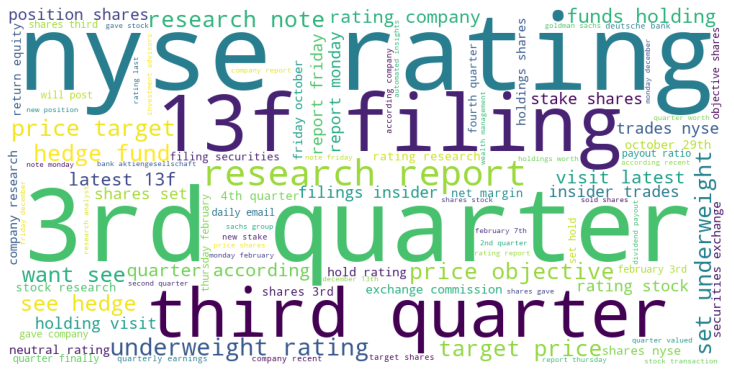

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = ex,
                min_font_size = 10).generate(text)

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
ppl_lg = ppl_lg.iloc[:,2:7]
ppl_lg

,Entities,Sentence,senti,0_prob,1_prob
0,Pedro Martinez,“We have no choice but to cancel classes tomor...,0,0.865050,0.134950
1,Jen Psaki,"White House press secretary Jen Psaki, echoing...",1,0.364637,0.635363
2,Joe Biden,"White House press secretary Jen Psaki, echoing...",1,0.364637,0.635363
3,Donald Trump,"White House press secretary Jen Psaki, echoing...",1,0.364637,0.635363
4,Jesse Sharkey,Chicago Teachers Union President Jesse Sharkey...,0,0.848452,0.151548
...,...,...,...,...,...
318405,Nyzireya Moore,Nyzireya Moore was pronounced dead shortly bef...,0,0.904800,0.095200
318406,David Brown,"At a press briefing Wednesday, Chicago Police ...",0,0.712389,0.287611
318407,Brown,"Brown would not elaborate, but vowed to go aft...",0,0.573550,0.426450
318408,"James Court||$42,720|","James Court||$42,720| Chambana Sun Help us con...",0,0.536154,0.463846


In [ ]:
ppl_lg.loc[ppl_lg["Entities"] == "Lightfoot", "Entities"] ="Lori Lightfoot"
ppl_lg.loc[ppl_lg["Entities"] == "Nagy", "Entities"] ="Matt Nagy"
ppl_lg.loc[ppl_lg["Entities"] == "DeRozan", "Entities"] ="DeMar DeRozan"
ppl_lg.loc[ppl_lg["Entities"] == "Cockburn", "Entities"] ="Kofi Cockburn"
ppl_lg.loc[ppl_lg["Entities"] == "LaVine", "Entities"] ="Zach LaVine"


In [ ]:
ppl_cnt_all = pd.DataFrame(ppl_lg.groupby(by="Entities").size().sort_values(ascending=False), columns = ["cnt"])
ppl_20 = ppl_cnt_all.head(20).reset_index()
ppl_20 = ppl_20.rename(columns = {"Entities":"Person"})
ppl_20

In [ ]:
#ppls = list(ppl_20.Person)

ppls = ["Pritzker"]

In [ ]:
ppl_sen_20= ppl_lg[[ x in ppls for x in ppl_lg["Entities"]]]
ppl_sen_20

,Entities,Sentence,senti,0_prob,1_prob
431,Pritzker,"But state Rep. Kelly Cassidy, a Chicago Democrat and the bill's chief sponsor in the House, said at a news conference with Pritzker Tuesday that she believes overturning Roe is just the first step in challenging all rights based on a right to privacy.",0,0.538433,0.461567
432,Pritzker,"That's what it's about,"" Pritzker said Tuesday in defending his decision.",0,0.768533,0.231467
434,Pritzker,"Pritzker, meanwhile, said that while Illinois has strong laws protecting access to abortions, those laws can be repealed by future legislatures.",1,0.453541,0.546459
435,Pritzker,"Related Article Leaked court document galvanizes anti-abortion activists Related Article Court that rarely leaks does so now in biggest case in years Related Article How Pritzker, GOP candidates are reacting to possible overturning of Roe Related Article Biden blasts 'radical' Roe draft, warns other rights at risk Related Article",0,0.912496,0.087504
965,Pritzker,"When asked this week if he thinks a shift to remote learning is necessary, Pritzker said the best thing is for students to be in school.",0,0.813674,0.186326
...,...,...,...,...,...
315550,Pritzker,Chicago-area nurse Beverly Miles has said she plans to challenge Pritzker but had not filed petitions as of Monday afternoon.,0,0.750126,0.249874
315560,Pritzker,"“I don’t know how they could recover, but the fact is my job is to educate everybody about what Democrats, Pritzker, Madigan and Welch have done statewide.”",0,0.703850,0.296150
315774,Pritzker,"In a news conference Monday, Pritzker said the ruling was “out of step with the vast majority of legal analysis.”",0,0.891105,0.108895
315775,Pritzker,"“Most importantly, it constrains the ability of the named school districts to maintain safe in-person learning requirements,” Pritzker continued.",0,0.639734,0.360266


In [ ]:
ppl_20_p = ppl_sen_20[(ppl_sen_20["senti"] == 0)]
ppl_20_p.shape

(935, 5)

In [ ]:
ppl_20_p["Entities"].value_counts()

Pritzker    935
Name: Entities, dtype: int64

In [ ]:
text = " ".join(ppl_20_p.Sentence).lower()

In [ ]:
cus = {"pedro","ceo","martinez"}

In [ ]:
ppls = [x.lower() for x in ppls]

In [ ]:
ppls

['pritzker']

In [ ]:
ex = set(STOPWORDS).union(set(ppls)).union(cus)

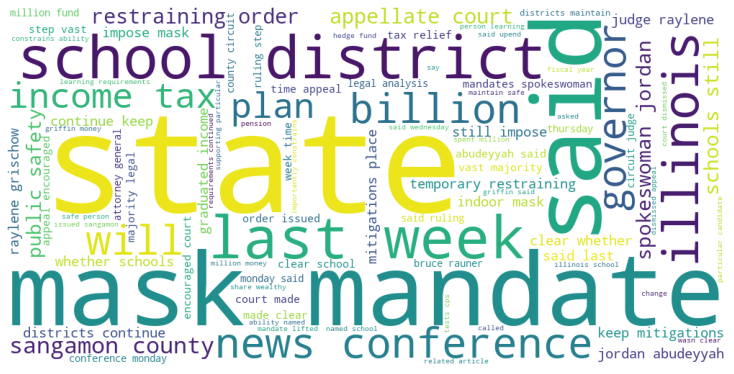

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = ex,
                min_font_size = 10).generate(text)

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [ ]:
pd.set_option('display.max_colwidth', None)
ppl_sen_20["Sentence"].head(20)

16                                                                                                                                                          Mayor Lori Lightfoot said the city had filed an unfair labor practices complaint, but didn't elaborate.
87                                                                           He also accused Mayor Lori Lightfoot of refusing to compromise on teachers’ main priorities and said union leadership can’t go back to members with what the mayor’s team has offered.
89                                                                                           Lightfoot, who has opted for one-on-one interviews with news outlets to get out her message, accused teachers of “abandoning” students by refusing to teach in-person.
90                                                                                                            “If I had a dollar for every time some privileged, clouted white guy called me stupid, I'd be a bazillionaire,

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import aspect_based_sentiment_analysis as absa

In [ ]:
dataPath = "/content/drive/MyDrive/NLP/"

In [ ]:
#!pip install aspect-based-sentiment-analysis

In [ ]:
#news = pd.read_csv(dataPath + "data_with_topics_cluster.csv")
ppl_lg = pd.read_csv(dataPath + "ppl_sentiment.csv")

In [ ]:
ppl_lg

,Unnamed: 0,index,Entities,Sentence,senti,0_prob,1_prob
0,0,0,Pedro Martinez,“We have no choice but to cancel classes tomor...,0,0.865050,0.134950
1,1,1,Jen Psaki,"White House press secretary Jen Psaki, echoing...",1,0.364637,0.635363
2,2,2,Joe Biden,"White House press secretary Jen Psaki, echoing...",1,0.364637,0.635363
3,3,3,Donald Trump,"White House press secretary Jen Psaki, echoing...",1,0.364637,0.635363
4,4,4,Jesse Sharkey,Chicago Teachers Union President Jesse Sharkey...,0,0.848452,0.151548
...,...,...,...,...,...,...,...
318405,318405,318405,Nyzireya Moore,Nyzireya Moore was pronounced dead shortly bef...,0,0.904800,0.095200
318406,318406,318406,David Brown,"At a press briefing Wednesday, Chicago Police ...",0,0.712389,0.287611
318407,318407,318407,Brown,"Brown would not elaborate, but vowed to go aft...",0,0.573550,0.426450
318408,318408,318408,"James Court||$42,720|","James Court||$42,720| Chambana Sun Help us con...",0,0.536154,0.463846


In [8]:
ppl_lg.loc[ppl_lg["Entities"] == "Lightfoot", "Entities"] ="Lori Lightfoot"
ppl_lg.loc[ppl_lg["Entities"] == "Nagy", "Entities"] ="Matt Nagy"
ppl_lg.loc[ppl_lg["Entities"] == "DeRozan", "Entities"] ="DeMar DeRozan"
ppl_lg.loc[ppl_lg["Entities"] == "Cockburn", "Entities"] ="Kofi Cockburn"
ppl_lg.loc[ppl_lg["Entities"] == "LaVine", "Entities"] ="Zach LaVine"

In [9]:
lori = ppl_lg[ppl_lg["Entities"] == "Lori Lightfoot"]
lori

,Unnamed: 0,index,Entities,Sentence,senti,0_prob,1_prob
16,16,16,Lori Lightfoot,Mayor Lori Lightfoot said the city had filed a...,0,0.834490,0.165510
87,87,87,Lori Lightfoot,He also accused Mayor Lori Lightfoot of refusi...,1,0.346735,0.653265
89,89,89,Lori Lightfoot,"Lightfoot, who has opted for one-on-one interv...",0,0.877307,0.122693
90,90,90,Lori Lightfoot,“If I had a dollar for every time some privile...,0,0.948022,0.051978
95,95,95,Lori Lightfoot,"President Joe Biden, who has pressed for schoo...",0,0.843016,0.156984
...,...,...,...,...,...,...,...
317803,317803,317803,Lori Lightfoot,She said Lightfoot and the district need to do...,0,0.728547,0.271453
317966,317966,317966,Lori Lightfoot,Chicago Mayor Lori Lightfoot has called the t...,0,0.771393,0.228607
317967,317967,317967,Lori Lightfoot,"""[Y]ou're not listening,"" Chicago Mayor Lori L...",0,0.689679,0.310321
317968,317968,317968,Lori Lightfoot,"A day earlier, Lightfoot said she and Chicago ...",0,0.722485,0.277515


In [14]:
lori_df = lori.iloc[0:100,].reset_index()

In [12]:
nlp = absa.load()

Downloading:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some layers from the model checkpoint at absa/classifier-rest-0.2 were not used when initializing BertABSClassifier: ['dropout_379']
- This IS expected if you are initializing BertABSClassifier from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertABSClassifier from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of BertABSClassifier were not initialized from the model checkpoint at absa/classifier-rest-0.2 and are newly initialized: ['dropout_37']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [15]:
text = lori_df["Sentence"][0]

In [ ]:
scores = []
i = 0
for sent in lori_df.Sentence:
  task = nlp(sent, aspects=['Lori Lightfoot'])
  temp = task.subtasks['Lori Lightfoot'].scores
  scores.append(temp)
  print(i)
  i = i + 1 

In [21]:
score_df = pd.DataFrame(scores,columns = ["negative","neutral","positive"])
score_df

,negative,neutral,positive
0,0.039886,0.943682,0.016432
1,0.004582,0.991812,0.003606
2,0.006010,0.988714,0.005276
3,0.715403,0.232782,0.051815
4,0.010460,0.001542,0.987998
...,...,...,...
95,0.877964,0.052514,0.069522
96,0.007434,0.005168,0.987398
97,0.542961,0.422272,0.034767
98,0.002488,0.001769,0.995743


In [25]:
lori_df["negative"] = score_df["negative"]
lori_df["neutral"] = score_df["neutral"]
lori_df["positive"] = score_df["positive"]
lori_df

,level_0,Unnamed: 0,index,Entities,Sentence,senti,0_prob,1_prob,negative,neutral,positive
0,16,16,16,Lori Lightfoot,Mayor Lori Lightfoot said the city had filed a...,0,0.834490,0.165510,0.039886,0.943682,0.016432
1,87,87,87,Lori Lightfoot,He also accused Mayor Lori Lightfoot of refusi...,1,0.346735,0.653265,0.004582,0.991812,0.003606
2,89,89,89,Lori Lightfoot,"Lightfoot, who has opted for one-on-one interv...",0,0.877307,0.122693,0.006010,0.988714,0.005276
3,90,90,90,Lori Lightfoot,“If I had a dollar for every time some privile...,0,0.948022,0.051978,0.715403,0.232782,0.051815
4,95,95,95,Lori Lightfoot,"President Joe Biden, who has pressed for schoo...",0,0.843016,0.156984,0.010460,0.001542,0.987998
...,...,...,...,...,...,...,...,...,...,...,...
95,1338,1338,1338,Lori Lightfoot,"Chicago, Illinois (WTVO) —Chicago Mayor Lori L...",0,0.883540,0.116460,0.877964,0.052514,0.069522
96,1339,1339,1339,Lori Lightfoot,"“Otherwise, vaccination and boosts make me fee...",0,0.744118,0.255882,0.007434,0.005168,0.987398
97,1340,1340,1340,Lori Lightfoot,[By tweet.]() Lightfoot was involved in negoti...,0,0.777788,0.222212,0.542961,0.422272,0.034767
98,1342,1342,1342,Lori Lightfoot,Chicago Mayor Lightfoot tested positive for CO...,0,0.586975,0.413025,0.002488,0.001769,0.995743


In [ ]:
nlp = absa.load()

Some layers from the model checkpoint at absa/classifier-rest-0.2 were not used when initializing BertABSClassifier: ['dropout_379']
- This IS expected if you are initializing BertABSClassifier from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertABSClassifier from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of BertABSClassifier were not initialized from the model checkpoint at absa/classifier-rest-0.2 and are newly initialized: ['dropout_37']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
sentences  = text.split(".")
#sentences

In [ ]:
text = news["text"][0]
#text = text[0:512]

In [ ]:
ppl,sch = nlp(text, aspects=['population',"decline"])

In [ ]:
ppl.sentiment

<Sentiment.negative: 1>

In [ ]:
absa.summary(ppl)

Sentiment.negative for "population"
Scores (neutral/negative/positive): [0.216 0.766 0.018]


In [ ]:
price.sentiment

<Sentiment.negative: 1>

In [ ]:
text = ("We are great fans of Slack, but we wish the subscriptions "
        "were more accessible to small startups.")

slack, price = nlp(text, aspects=['slack', 'price'])
assert price.sentiment == absa.Sentiment.negative
assert slack.sentiment == absa.Sentiment.positive

In [ ]:
from transformers import BertTokenizer
name = 'absa/classifier-lapt-0.2'
model = absa.BertABSClassifier.from_pretrained(name)
tokenizer = BertTokenizer.from_pretrained(name)
professor = absa.Professor()     # Explained in detail later on.
text_splitter = absa.sentencizer()  # The English CNN model from SpaCy.
nlp = absa.Pipeline(model, tokenizer, professor, text_splitter)
task = nlp(text=text, aspects=['school','chicago','student'])
tokenized_examples = nlp.tokenize(task.examples)
input_batch = nlp.encode(tokenized_examples)
output_batch = nlp.predict(input_batch)
predictions = nlp.review(tokenized_examples, output_batch)
completed_task = nlp.postprocess(task, predictions)

In [ ]:
completed_task.examples

[PredictedExample(text='CHICAGO (AP) —', aspect='school', sentiment=<Sentiment.neutral: 0>, text_tokens=['chicago', '(', 'ap', ')', '—'], text_subtokens=['chicago', '(', 'ap', ')', '—'], aspect_tokens=['school'], aspect_subtokens=['school'], tokens=['[CLS]', 'chicago', '(', 'ap', ')', '—', '[SEP]', 'school', '[SEP]'], subtokens=['[CLS]', 'chicago', '(', 'ap', ')', '—', '[SEP]', 'school', '[SEP]'], alignment=[[0], [1], [2], [3], [4], [5], [6], [7], [8]], scores=[0.9796749, 0.006459577, 0.013865583], review=Review(is_reference=None, patterns=None)),
 PredictedExample(text='Chicago school leaders canceled classes Thursday for a second consecutive day after failing to reach agreement with the teachers union over COVID-19 safety protocols in the nation’s third-largest school district.', aspect='school', sentiment=<Sentiment.negative: 1>, text_tokens=['chicago', 'school', 'leaders', 'canceled', 'classes', 'thursday', 'for', 'a', 'second', 'consecutive', 'day', 'after', 'failing', 'to', 'reac